In [1]:
import mne
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append(os.path.join('..'))
from utils.preprocessing import preprocess

In [2]:
eeg_data_directory = os.path.join('..', '..', 'data', 'things-eeg')

# get all files in the directory
subjects = [folder for folder in os.listdir(eeg_data_directory) if folder.startswith('sub-')]
eeg_data_file_paths = [os.path.join(eeg_data_directory, subject, 'eeg', file) for subject in subjects for file in os.listdir(os.path.join(eeg_data_directory, subject, 'eeg')) if file.endswith('.vhdr')]

In [3]:
# Read EEG data
raw = mne.io.read_raw_brainvision(eeg_data_file_paths[48], preload=True)
raw

Extracting parameters from ..\..\data\things-eeg\sub-49\eeg\sub-49_task-rsvp_eeg.vhdr...
Setting channel info structure...
Reading 0 ... 4363899  =      0.000 ...  4363.899 secs...


<RawBrainVision | sub-49_task-rsvp_eeg.eeg, 127 x 4363900 (4363.9 s), ~4.13 GiB, data loaded>

In [5]:
raw2 = mne.io.read_raw_brainvision(eeg_data_file_paths[47], preload=True)
raw2.ch_names

Extracting parameters from ..\..\data\things-eeg\sub-48\eeg\sub-48_task-rsvp_eeg.vhdr...
Setting channel info structure...
Reading 0 ... 3369979  =      0.000 ...  3369.979 secs...


['Fp1',
 'Fz',
 'F3',
 'F7',
 'FT9',
 'FC5',
 'FC1',
 'C3',
 'T7',
 'TP9',
 'CP5',
 'CP1',
 'Pz',
 'P3',
 'P7',
 'O1',
 'Oz',
 'O2',
 'P4',
 'P8',
 'TP10',
 'CP6',
 'CP2',
 'C4',
 'T8',
 'FT10',
 'FC6',
 'FC2',
 'F4',
 'F8',
 'Fp2',
 'AF7',
 'AF3',
 'AFz',
 'F1',
 'F5',
 'FT7',
 'FC3',
 'C1',
 'C5',
 'TP7',
 'CP3',
 'P1',
 'P5',
 'PO7',
 'PO3',
 'POz',
 'PO4',
 'PO8',
 'P6',
 'P2',
 'CPz',
 'CP4',
 'TP8',
 'C6',
 'C2',
 'FC4',
 'FT8',
 'F6',
 'AF8',
 'AF4',
 'F2',
 'FCz']

In [8]:
set(raw.ch_names) - set(raw2.ch_names)

{'AFF1h',
 'AFF2h',
 'AFF5h',
 'AFF6h',
 'AFp1',
 'AFp2',
 'CCP1h',
 'CCP2h',
 'CCP3h',
 'CCP4h',
 'CCP5h',
 'CCP6h',
 'CPP1h',
 'CPP2h',
 'CPP3h',
 'CPP4h',
 'CPP5h',
 'CPP6h',
 'Cz',
 'F10',
 'F9',
 'FCC1h',
 'FCC2h',
 'FCC3h',
 'FCC4h',
 'FCC5h',
 'FCC6h',
 'FFC1h',
 'FFC2h',
 'FFC3h',
 'FFC4h',
 'FFC5h',
 'FFC6h',
 'FFT10h',
 'FFT7h',
 'FFT8h',
 'FFT9h',
 'FTT10h',
 'FTT7h',
 'FTT8h',
 'FTT9h',
 'O10',
 'O9',
 'OI1h',
 'OI2h',
 'P10',
 'P9',
 'PO10',
 'PO9',
 'POO1',
 'POO10h',
 'POO2',
 'POO9h',
 'PPO10h',
 'PPO1h',
 'PPO2h',
 'PPO5h',
 'PPO6h',
 'PPO9h',
 'TPP10h',
 'TPP7h',
 'TPP8h',
 'TPP9h',
 'TTP7h',
 'TTP8h'}

In [5]:
preprocessed = preprocess(raw)
preprocessed

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 3301 samples (3.301 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:   11.1s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Fitting ICA to data using 121 channels (please be patient, this may take a while)


KeyboardInterrupt: 

In [5]:
preprocessed.to_data_frame()

,time,Fp1,Fz,F3,F7,FT9,FC5,FC1,C3,T7,...,TP8,C6,C2,FC4,FT8,F6,AF8,AF4,F2,FCz
0,0.000,-1.581847e-12,-3.643831e-14,4293.161864,1450.145742,-2.121987e-13,-2.137778e-15,-9.361695e-14,-1.588376e-13,-6.628247e-13,...,1.359304e-13,1.410105e-13,1.507538e-13,-7.839455e-13,-3.045282e-13,4.169614e-14,1.143900e-12,2627.391233,7.496060e-13,4.755990e-13
1,0.001,-4.567373e+00,-4.524567e+00,4287.302492,1448.729727,-5.320838e+00,-2.924930e+00,-3.165844e-01,3.177611e-01,-7.080915e-02,...,9.030058e-01,-7.595357e-02,3.030173e-01,5.055594e+00,-8.667806e-01,-2.145181e-01,-8.517251e-01,2626.951780,-1.118016e+00,-4.636913e+00
2,0.002,-8.735721e+00,-8.772376e+00,4281.833745,1447.069572,-1.039238e+01,-5.794497e+00,-6.468327e-01,6.155188e-01,-1.666775e-01,...,1.754428e+00,-1.433574e-01,5.830663e-01,9.994554e+00,-1.692853e+00,-4.340644e-01,-1.649004e+00,2622.947876,-2.172616e+00,-8.930780e+00
3,0.003,-1.214715e+01,-1.248764e+01,4278.025153,1443.602776,-1.498422e+01,-8.552554e+00,-1.001676e+00,8.747204e-01,-3.094137e-01,...,2.506899e+00,-1.946402e-01,8.189864e-01,1.469864e+01,-2.441591e+00,-6.633663e-01,-2.343001e+00,2616.795535,-3.107158e+00,-1.256555e+01
4,0.004,-1.451927e+01,-1.545472e+01,4277.390388,1441.112543,-1.890201e+01,-1.114323e+01,-1.387806e+00,1.080591e+00,-5.140804e-01,...,3.120954e+00,-2.243070e-01,9.933547e-01,1.904836e+01,-3.084450e+00,-9.064353e-01,-2.895122e+00,2615.867801,-3.876662e+00,-1.527629e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3227275,3227.275,-1.031923e+00,-7.062179e+00,6516.451742,-1019.677212,3.535857e+00,5.134088e+00,3.644390e+00,2.606128e+00,4.643835e+00,...,5.818484e-01,6.797229e-01,-1.680857e+00,-1.289428e+01,1.299584e+00,-2.447859e+00,-3.884700e+00,1690.770619,-4.856126e+00,-2.510192e-01
3227276,3227.276,-9.206895e-01,-5.518965e+00,6515.084555,-1019.237759,2.749802e+00,3.956815e+00,2.821388e+00,2.030968e+00,3.545396e+00,...,4.995809e-01,5.420496e-01,-1.270725e+00,-1.029593e+01,1.291954e+00,-1.652172e+00,-2.964027e+00,1693.993273,-3.595651e+00,4.989082e-01
3227277,3227.277,-6.840523e-01,-3.783203e+00,6519.430256,-1018.017057,1.884442e+00,2.691406e+00,1.926551e+00,1.393104e+00,2.394469e+00,...,3.651075e-01,3.780122e-01,-8.522869e-01,-7.175532e+00,1.021817e+00,-1.004402e+00,-1.998218e+00,1695.409288,-2.371150e+00,6.869874e-01
3227278,3227.278,-3.628312e-01,-1.921981e+00,6520.748614,-1019.042447,9.588691e-01,1.362686e+00,9.778925e-01,7.089932e-01,1.206894e+00,...,1.924838e-01,1.943569e-01,-4.278811e-01,-3.683616e+00,5.624483e-01,-4.707700e-01,-1.005165e+00,1694.676867,-1.176451e+00,4.560463e-01


Using matplotlib as 2D backend.


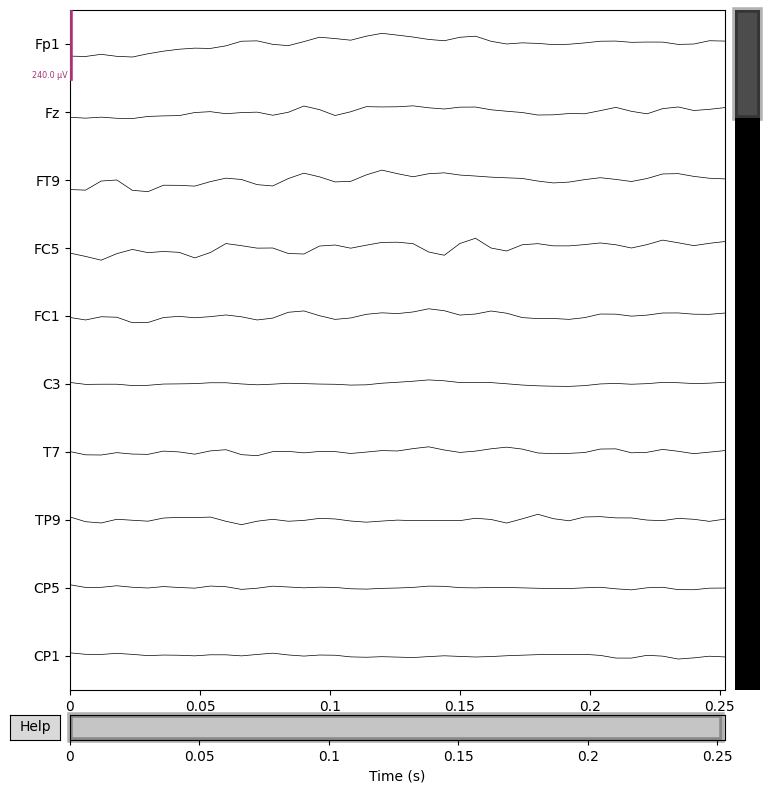

In [6]:
# get first 10 seconds of data
preprocessed_event_epoch = preprocessed.copy().crop(tmin=10.723, tmax=10.975)
figure = preprocessed_event_epoch.plot(n_channels=10, scalings={ 'eeg': 20e-6 * 6 }, title='First 10 seconds of EEG data')

In [7]:
montage = mne.channels.make_standard_montage('standard_1020')
preprocessed.set_montage(montage)

C:\Users\dubs2\AppData\Local\Temp\ipykernel_27624\1429204291.py:2: RuntimeWarning: Not setting positions of 6 eog channels found in montage:
['F3', 'F7', 'F4', 'F8', 'AF3', 'AF4']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  preprocessed.set_montage(montage)


<RawBrainVision | sub-02_task-rsvp_eeg.eeg, 63 x 3227280 (3227.3 s), ~1.51 GiB, data loaded>

In [8]:
# from annotations, create epoch between Event/E  1 and Event/E  2
events, event_id = mne.events_from_annotations(preprocessed, regexp="Event/E  1")
events, event_id

Used Annotations descriptions: [np.str_('Event/E  1')]


(array([[  38305,       0,   10001],
        [  38405,       0,   10001],
        [  38505,       0,   10001],
        ...,
        [3210447,       0,   10001],
        [3210547,       0,   10001],
        [3210647,       0,   10001]], shape=(24648, 3)),
 {np.str_('Event/E  1'): 10001})

In [9]:
epochs = mne.Epochs(preprocessed, events, event_id=10001, tmin=-0.001, tmax=0.051, baseline=(None, 0), preload=True)
epochs

Not setting metadata
24648 matching events found
Setting baseline interval to [-0.001, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 24648 events and 53 original time points ...
0 bad epochs dropped


<Epochs | 24648 events (all good), -0.001 – 0.051 s (baseline -0.001 – 0 s), ~628.0 MiB, data loaded,
 '10001': 24648>

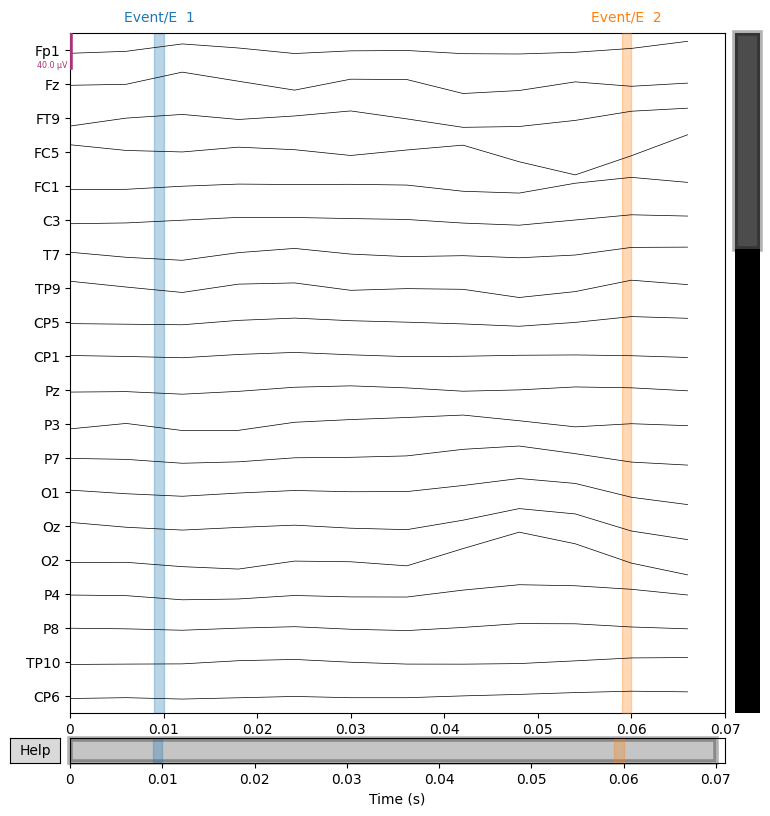

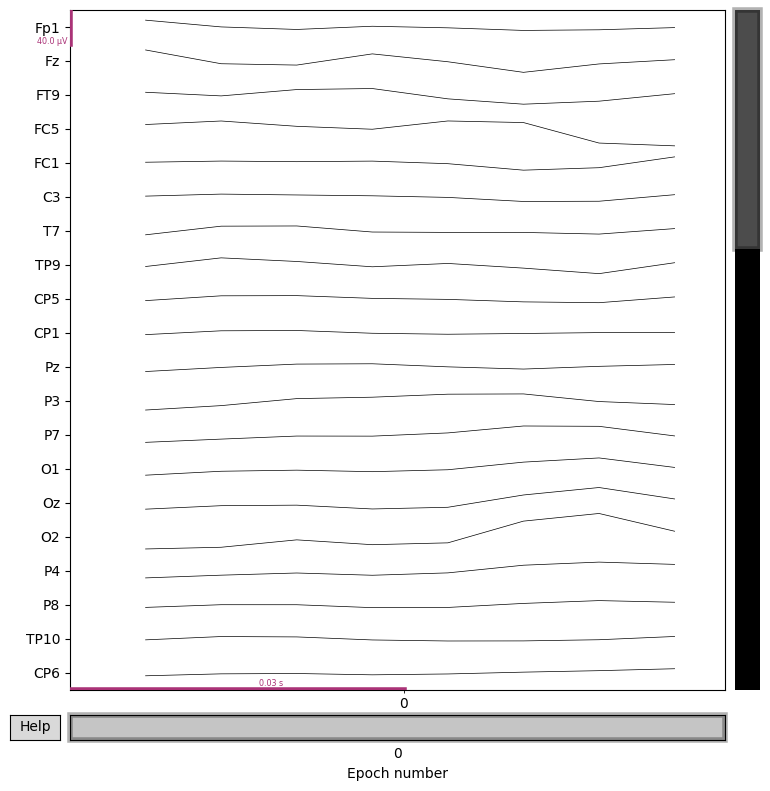

In [11]:
# plot first epoch based on onset times
preprocessed_event_epoch = preprocessed.copy().crop(tmin=38.296, tmax=38.366)
figure = preprocessed_event_epoch.plot()

# plot actual epoch
figure = epochs[0].plot()

In [12]:
objects = pd.read_csv(os.path.join(eeg_data_directory, 'sub-01', 'eeg', 'sub-01_task-rsvp_events.tsv'), sep='\t')['object'].to_numpy()
objects

array(['carousel', 'piano', 'turntable', ..., 'lollipop', 'candy_bar',
       'spout'], shape=(22248,), dtype=object)

In [13]:
epochs._data

array([[[-8.65694466e-07,  8.65694466e-07,  2.38814235e-06, ...,
         -2.92602193e-06, -2.00198581e-06, -9.48551696e-07],
        [-1.45787974e-06,  1.45787974e-06,  4.01043207e-06, ...,
         -7.14590036e-06, -8.43330002e-06, -9.57788043e-06],
        [-1.83105375e-06,  1.83105375e-06,  1.14746035e-06, ...,
         -5.98144225e-06, -8.91112825e-06, -1.39404225e-05],
        ...,
        [-2.34374880e-06,  2.34374880e-06,  8.64257370e-06, ...,
          6.54296540e-06,  3.95507610e-06, -2.78320170e-06],
        [ 6.43143979e-07, -6.43143979e-07, -2.36495640e-06, ...,
         -1.18150509e-05, -1.05149041e-05, -9.55365189e-06],
        [-2.12050316e-06,  2.12050316e-06,  5.86233307e-06, ...,
         -8.42446198e-06, -1.15551192e-05, -1.45115845e-05]],

       [[-2.91186407e-07,  2.91186407e-07,  1.11522045e-06, ...,
          1.02320027e-05,  9.10148381e-06,  7.94074675e-06],
        [-1.05356699e-06,  1.05356699e-06,  2.96313454e-06, ...,
          5.26673652e-06,  1.90083254e

In [ ]:
epochs.get_data()

array([[[-2.53906120e-06,  2.53906120e-06,  1.46484300e-07, ...,
         -2.59277211e-05, -2.98827972e-05, -3.31542799e-05],
        [-2.39257690e-06,  2.39257690e-06, -8.78905800e-07, ...,
         -1.18652283e-05, -1.51367110e-05, -2.05566301e-05],
        [-1.83105375e-06,  1.83105375e-06,  1.14746035e-06, ...,
         -5.98144225e-06, -8.91112825e-06, -1.39404225e-05],
        ...,
        [-2.34374880e-06,  2.34374880e-06,  8.64257370e-06, ...,
          6.54296540e-06,  3.95507610e-06, -2.78320170e-06],
        [ 1.02539010e-06, -1.02539010e-06,  1.64062416e-05, ...,
          1.07421820e-05,  1.09374944e-05,  7.03124640e-06],
        [-2.31933475e-06,  2.31933475e-06,  3.29589675e-06, ...,
         -2.26318244e-05, -2.60986195e-05, -3.09814295e-05]],

       [[-2.95410005e-06,  2.95410005e-06,  3.88183395e-06, ...,
          1.76513582e-05, -8.47167535e-06, -2.05322160e-05],
        [-3.71093560e-06,  3.71093560e-06,  8.05663650e-06, ...,
          2.08495987e-05, -3.85741990e

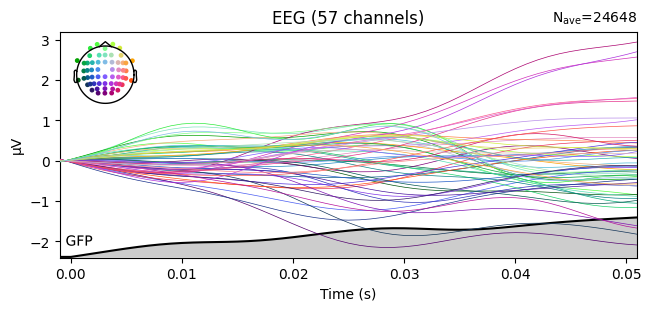

In [14]:
epochs.average().plot(gfp=True, spatial_colors=True, show=False)